In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px
import pandas as pd
import MDAnalysis as mda

import numpy as np
import plumed
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.cluster import KMeans

In [6]:
# Devo prima creare un array con tutti i valori assunti dalla variabile collettiva
data_colvar = plumed.read_as_pandas("COLVAR")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_1791/3662556624.py:2: UserWarning:

cannot load PLUMED instance, conversions will not be available



No handles with labels found to put in legend.


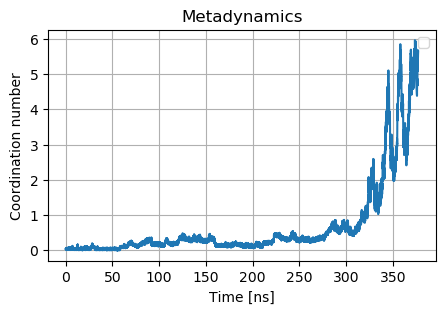

In [7]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(data_colvar["time"]*0.01, data_colvar["d2"])
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Coordination number")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

In [8]:
# Attenzione: il COLVAR è campionato ad una frequenza diversa rispetto al COORD
# L'idea più semplice a questo punto è prendere le distanze salvate in COORD (e non su COLVAR)

# Seleziono configurazioni più vicine a [0.05, 0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1]

# Recover the distances

def find_closest_elements(array, numbers):
    result = []

    for num in numbers:
        # Find the index of the element in the array that is closest to num
        index = np.argmin(np.abs(np.array(array) - num))
        result.append((index, array[index]))

    return result

config = [0.05, 0.1, 0.25, 0.4, 0.55, 0.7, 0.85, 1]

output = find_closest_elements(data_colvar["d2"], config)

print("Closest frames:", output)

Closest frames: [(2620, 0.049993), (6330, 0.100005), (26135, 0.25000500000000003), (22970, 0.399994), (29463, 0.549951), (28869, 0.7000029999999999), (31882, 0.850093), (31796, 0.9995629999999999)]


In [9]:
frames = []
for i in range(len(output)):
    frames.append(output[i][0])

In [10]:
frames

[2620, 6330, 26135, 22970, 29463, 28869, 31882, 31796]

In [22]:
labels_sim[frames]

array([1., 2., 1., 1., 3., 3., 3., 0.])